In [1]:
# Importing the libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# loading the data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

# The Demand of Job Titles over the course of the year.

In [2]:
df_usa= df[df['job_country'] == 'United States'].copy()

To create the month column from datetime data type we use `dt.strftime(%B)`....   %B stands for month
- url: doc.python.org/3/library/datetime.html

In [3]:
# To create the month column we use dt.strftime(%B)....   %B stands for month
df_usa['job_posted_month']= df['job_posted_date'].dt.strftime('%B')

In [4]:
df_usa_pivot = df_usa.pivot_table(index= 'job_posted_month', columns= 'job_title_short', aggfunc='size')
df_usa_pivot = df_usa_pivot.reset_index()
df_usa_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,565,40,6049,2801,4867,51,1025,781,991,112
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
2,December,648,40,3979,2641,3472,119,601,689,752,212
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
5,July,581,39,5201,2570,4876,65,883,747,1095,153
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
8,May,279,20,4993,2976,4377,49,839,746,914,90
9,November,719,36,4531,2793,4175,132,656,684,816,194


In [5]:
pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B')

0    1900-04-01
1    1900-08-01
2    1900-12-01
3    1900-02-01
4    1900-01-01
5    1900-07-01
6    1900-06-01
7    1900-03-01
8    1900-05-01
9    1900-11-01
10   1900-10-01
11   1900-09-01
Name: job_posted_month, dtype: datetime64[ns]

In [6]:
# drop the job_posted_month from being an index to be able to create a new column from it
df_usa_pivot['month_num'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month
df_usa_pivot
# .dt.month took the number of month only 

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_num
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [7]:
df_usa_pivot_sorted = df_usa_pivot.sort_values('month_num')
df_usa_pivot_sorted

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_num
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
11,September,897,50,4639,3224,4568,113,805,775,1014,228,9
10,October,932,48,5271,3015,4882,101,871,672,987,219,10


In [8]:
df_usa_pivot_sorted = df_usa_pivot_sorted.set_index('job_posted_month')


In [9]:
df_usa_pivot_sorted

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_num
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,565,40,6049,2801,4867,51,1025,781,991,112,4
May,279,20,4993,2976,4377,49,839,746,914,90,5
June,446,32,5683,2893,4645,48,1009,812,1033,93,6
July,581,39,5201,2570,4876,65,883,747,1095,153,7
August,903,39,6634,3269,6318,68,1186,903,1515,194,8
September,897,50,4639,3224,4568,113,805,775,1014,228,9


In [10]:
df_usa_graph = df_usa_pivot_sorted.drop(columns= 'month_num') # I should specify that the thing i wanna drop is a column, hence column=
df_usa_graph

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [11]:
# choosing the top posted jobs I wanna show in the graph
top3 = df_usa['job_title_short'].value_counts().head(3).index

In [12]:
df_usa_graph[top3]

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_month,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4779,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6634,6318,3269
September,4639,4568,3224


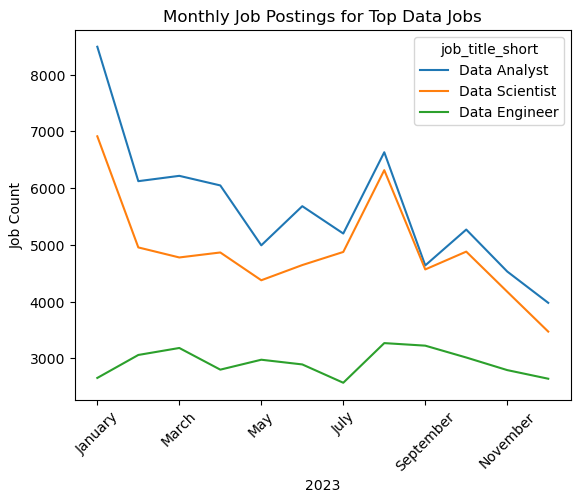

In [13]:
df_usa_graph[top3].plot(kind= 'line')
plt.title('Monthly Job Postings for Top Data Jobs')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.xticks(rotation=45 )
plt.show()

## Tried this by myself before

In [25]:
df_egypt= df[df['job_country'] == 'Egypt'].copy()

In [17]:
top3_jobs = df_egypt.groupby('job_title_short')['job_posted_date'].count().sort_values(ascending= False).head(3).index
top3_jobs

Index(['Data Analyst', 'Data Scientist', 'Data Engineer'], dtype='object', name='job_title_short')

In [26]:
df_egypt['month_num'] = pd.to_datetime(df_egypt['job_posted_date']).dt.month

In [27]:
df_egypt['posted_month']= df['job_posted_date'].dt.strftime('%B')

In [33]:
df_pivot = df_egypt.pivot_table(index=['posted_month','month_num'],columns='job_title_short',aggfunc='size')
df_pivot

,job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
posted_month,month_num,,,,,,,,,,
April,4,12,6,18,17,14,8,8,14,1,9
August,8,44,13,56,76,58,11,15,33,18,45
December,12,41,10,49,41,68,8,18,20,15,26
February,2,16,4,37,31,26,5,12,13,13,7
January,1,15,11,42,45,36,6,9,18,13,15
July,7,9,3,28,41,41,7,15,26,13,27
June,6,5,5,12,38,26,10,9,23,5,9
March,3,15,5,28,30,25,3,8,12,10,7
May,5,1,7,11,25,23,4,3,26,12,5


In [30]:
df_pivot_jobs = df_pivot[top3_jobs]
df_pivot_jobs

,job_title_short,Data Analyst,Data Scientist,Data Engineer
posted_month,month_num,,,
April,4,18,14,17
August,8,56,58,76
December,12,49,68,41
February,2,37,26,31
January,1,42,36,45
July,7,28,41,41
June,6,12,26,38
March,3,28,25,30
May,5,11,23,25


I can't retrieve the month number from it as long as it's an index, so i should make it a column and add a new index that would be replaced later with 
`.set.index()`

In [34]:
trial = df_pivot_jobs.reset_index() # makes the index into a column
trial

job_title_short,posted_month,month_num,Data Analyst,Data Scientist,Data Engineer
0,April,4,18,14,17
1,August,8,56,58,76
2,December,12,49,68,41
3,February,2,37,26,31
4,January,1,42,36,45
5,July,7,28,41,41
6,June,6,12,26,38
7,March,3,28,25,30
8,May,5,11,23,25
9,November,11,116,91,69


In [36]:
trial.sort_values('month_num',inplace= True)

In [37]:
trial_right = trial.set_index('posted_month')
trial_right.drop(columns='month_num')


job_title_short,Data Analyst,Data Scientist,Data Engineer
posted_month,,,
January,42,36,45
February,37,26,31
March,28,25,30
April,18,14,17
May,11,23,25
June,12,26,38
July,28,41,41
August,56,58,76
September,56,58,38


In [38]:
egypt_data_jobs = trial_right.drop(columns='month_num')

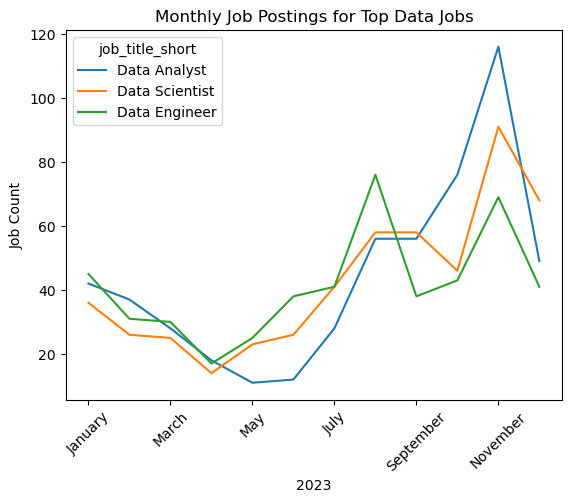

In [39]:
egypt_data_jobs.plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.xticks(rotation=45 )
plt.show()